# 1️⃣  <span style = 'background-color: lightgreen ; color:black'>**library 및 data load**</span>

In [99]:
# library load

## 분석 툴
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 시각화 툴
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

##한글설정
# [참고](https://itisik.tistory.com/114)
import matplotlib.font_manager as fm

font_dirs = ['/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

import warnings
warnings.filterwarnings(action='ignore')

In [88]:
# data load
train = pd.read_csv('data/train.csv') # 모델 학습 파일
test = pd.read_csv('data/test.csv') # 모델 시험지 파일
submission = pd.read_csv('data/submission.csv') #답안지 파일 ; 제출 파일 형식

# 2️⃣  <span style = 'background-color: lightgreen ; color:black'>**탐색적 자료분석**</span>
Exploratory Data Analysis (EDA)

### <span style = 'color:green'> **Columns Detail** </span>
```
* id:               고유 id
* hour:             시간
* temperature:      기온
* precipitation:    비가 오지 않았으면 0, 비가 오면 1
* windspeed:        풍속 (평균)
* humidity:         습도
* visibility:       시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone:            오존
* pm10:             미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5:            미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
```
---
이하는 train, submission에만 있는 col
```
* count:            train~ 시간에 따른 따릉이 대여 수 / sub~ 예측한 대여 수 기입
```

In [62]:
tr_cols = train.columns.values
te_cols = test.columns.values
sub_cols = submission.columns.values

f'train cols 길이: {len(tr_cols)}'
f'test cols 길이: {len(te_cols)}'
f'submission cols 길이: {len(sub_cols)}'

f'train data에는 있고 test data에는 없는 col: {set(tr_cols) - set(te_cols)}'

'train cols 길이: 11'

'test cols 길이: 10'

'submission cols 길이: 2'

"train data에는 있고 test data에는 없는 col: {'count'}"

### <span style = 'color:orange'> **df.shape** </span>

In [4]:
train.shape
test.shape
submission.shape # test로 예측해서 나온 결과 제출하란 것.

(1459, 11)

(715, 10)

(715, 2)

### <span style = 'color:orange'> **df.info()** </span>
* df의 col별 정보
* 비어있지 않은 값 (non-null) 몇 개?
* col의 type

In [5]:
print('[train] info')
train.info()

[train] info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [6]:
print('[test] info')
test.info()

[test] info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [7]:
print('[submission] info')
submission.info()

[submission] info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      715 non-null    int64  
 1   count   0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 11.3 KB


### <span style = 'color:orange'> **df.describe()** </span>
* 숫자형 (int, float) col들의 기술 통계량을 보여주는 <span style = 'color:red'>함수</span>

    * 기술통계량이란? <br>
        해당 col을 대표할 수 있는 통계값들을 의미 <br>
        <br>
    * 기술통계량 종류 <br>
        ```
        * count:     해당 column에서 비어있지 않은 값의 개수
        * mean:      평균
        * std:       표준편차
        * min:       최솟값 (이상치 포함)
        * 25% (Q1):  전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
        * 50% (Q2):  중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
        * 75% (Q3):  전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
        * max:       최댓값 (이상치 포함)
        ```
        <br>
    * 이상치: 울타리 밖에 있는 부분을 이상치라고 정의 <br>
        ```
        * 아래쪽 울타리: Q_1Q1 -1.5 * IQR1.5 * IQR
        * 위쪽 울타리:   Q_3Q3 + 1.5 * IQR1.5 * IQR
        * IQRIQR =      Q_3 - Q_1Q3 - Q1
        ```

In [8]:
print('<train> describe')
train.describe()

print('')
print('')
print('<test> describe')
test.describe()

print('')
print('')
print('<submission> describe')
submission.describe()

<train> describe


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000




<test> describe


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000




<submission> describe


,id,count
count,715.000000,0.0
mean,1056.854545,NaN
std,625.574471,NaN
min,0.000000,NaN
25%,507.000000,NaN
50%,1046.000000,NaN
75%,1616.500000,NaN
max,2177.000000,NaN


### <span style = 'color:orange'> **df.head(n)** </span>
* df의 위에서부터 n개 행

In [9]:
print('<train> head')
train.head()

print('')
print('')
print('<test> head')
test.head()

print('')
print('')
print('<submission> head')
submission.head()

<train> head


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0




<test> head


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0




<submission> head


,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


### <span style = 'color:orange'> **df.tail(n)** </span>
* df의 아래에서부터 n개 행

In [10]:
print('<train> tail')
train.tail()

print('')
print('')
print('<test> tail')
test.tail()

print('')
print('')
print('<submission> tail')
submission.tail()

<train> tail


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0




<test> tail


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0
714,2177,8,22.3,0.0,1.0,63.0,1277.0,0.007,30.0,24.0




<submission> tail


,id,count
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN
714,2177,NaN


### <span style = 'color:orange'> **df.groupby()** </span>
* 집단에 대한 통계량 확인

ex) 습한 날의 count의 평균 이런 걸 볼 수 있음. (우선 습한 정도를 어느정도 기준에 따라 <<심하다/ 보통이다/ 전혀 습하지 않다>> 정도로 전처리 해야함.)

# <span style = 'background-color: lightgreen ; color:black'>**시각화**</span>

#### **그림판 크기** 설정

In [60]:
fig = plt.figure(figsize = (12,3))

<Figure size 864x216 with 0 Axes>

In [63]:
tr_cols
te_cols


array(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype=object)

array(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'], dtype=object)

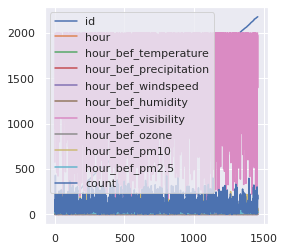

In [66]:
_ = train.plot()

# ~~~ 별 count
x는 나머지 feature, y는 count 고정

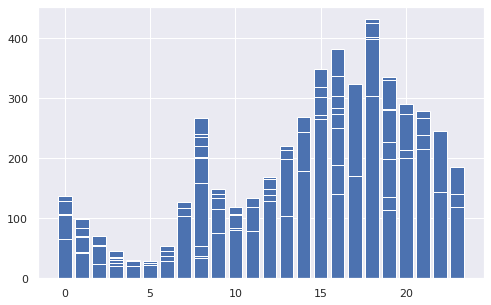

In [74]:
fig = plt.figure(figsize = (8,5))
_ = plt.bar('hour', 'count', data = train)

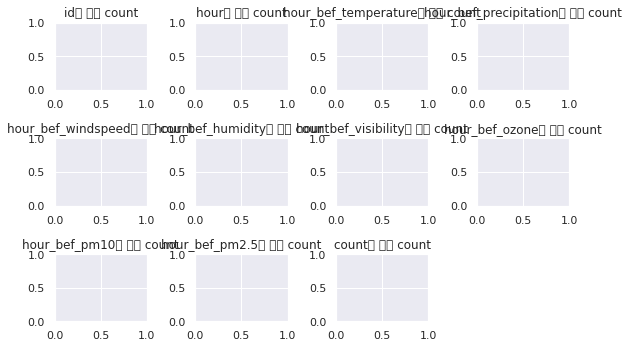

In [100]:
fig = plt.figure(figsize = (8,5))
# axes = fig.subplots(len(tr_cols)//3, 4)
rows = len(tr_cols)//3
cols = 3+1
for python_idx,j in enumerate(tr_cols):
    # _ = axes[i].bar(j, 'count', data = train)
    _=ax = fig.add_subplot(rows, cols, python_idx+1)
    _ = ax.set_title(f'{j}에 대한 count')
    

plt.tight_layout() # axes별 간격 조정

# 한글 설정

## 적용을 희망하는 폰트의 영어이름 알아내기

In [97]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
for i in font_list[:]:
    if 'Nanum' in i:
        print(i)

C:\Users\kelly\AppData\Local\Microsoft\Windows\Fonts\NanumSquare_acL.ttf
C:\Users\kelly\AppData\Local\Microsoft\Windows\Fonts\NanumSquare.ttf
C:\Users\kelly\AppData\Local\Microsoft\Windows\Fonts\NanumSquare_0.ttf
C:\Users\kelly\AppData\Local\Microsoft\Windows\Fonts\NanumSquare_acR.ttf


## 한글폰트 영구 등록

In [98]:
##설정 파일 위치
print (mpl.matplotlib_fname())
# 출력된 위치의 파일을 메모장이나 워드패드로 열어서 font.family를 찾아서 변경

c:\Users\kelly\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
